# Employee Wellness, Performance, and Retention Analysis




In [1]:
import os;
os.listdir ('/kaggle/input/')


['wellness2', 'wellness']

# **IMPORTING THE DATA SET**

In [2]:
#import library 
import pandas as pd

#Read each sheet into a Dataframe 

df_sheet1 = pd.read_excel('/kaggle/input/wellness/Vacation and wellness.xlsx', sheet_name = 'Vacation n Wellness 2022')
df_sheet2 = pd.read_excel('/kaggle/input/wellness/Vacation and wellness.xlsx', sheet_name = 'Vacation n Wellness 2023')

# **Merged sheets and Display the first few rows**

In [3]:
#Merged the sheets using a full outer join

merged_df = pd.merge (df_sheet1, df_sheet2, on = 'Employee ID', how = 'outer')

#Display the first few rows of the merged Dataframe

merged_df.head()

,Employee ID,Gender_x,Hire Date_x,Position Title_x,Grade_x,Division Classification_x,Company_x,Career Stream_x,Event Date_x,Employee Status_x,...,Event,Termination Date_y,Wellness - Used_y,Wellness - Accrued_y,Wellness Used- %,Wellness-round up,Vacation - Used_y,Vacation - Accrued_y,Vacation Used - %,Vacation-round up
0,24,Woman,2003-05-26,Mgr Client Services & Administration,P7,MI-ISS,Mackenzie Financial Corporation,Professional,2020-02-19,Terminated,...,Termination,2020-02-18,0.0,0.0,0.00,0%,0.0,0.0,0.0,0%
1,101,Woman,1982-08-09,Snr Mgr Client Act Mgt & Special Sup,L8,IGM-CSO,Investors Group Financial Services,Leader,2022-10-16,Active,...,Data Change,NaT,9.0,10.0,0.90,90%,25.0,25.0,1.0,100%
2,104,Woman,1982-12-13,Loss Mitigation Analyst,P5,IG-InsMtgBnk,Investors Group Investment Management,Professional,2022-03-01,Active,...,Data Change,2023-12-31,8.5,10.0,0.85,90%,25.0,25.0,1.0,100%
3,161,Man,1980-10-27,Director Real Estate Asset Mgmt,P9,IG-IGIM,Investors Group Investment Management,Professional,2021-01-01,Terminated,...,Termination,2020-12-31,0.0,0.0,0.00,0%,0.0,0.0,0.0,0%
4,311,Woman,1977-07-04,Snr Mgr Learning & Communication,L8,IGM-CSO,Investors Group Financial Services,Leader,2020-02-12,Terminated,...,Termination,2020-02-11,0.0,0.0,0.00,0%,0.0,0.0,0.0,0%


# **DISPLAY BASIC INFORMATION AND STATISTICS OF THE DATAFRAME**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Display basic info and statistics of the DataFrame

print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6929 entries, 0 to 6928
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Employee ID                    6929 non-null   int64         
 1   Gender_x                       6044 non-null   object        
 2   Hire Date_x                    6044 non-null   datetime64[ns]
 3   Position Title_x               6043 non-null   object        
 4   Grade_x                        6044 non-null   object        
 5   Division Classification_x      6044 non-null   object        
 6   Company_x                      6044 non-null   object        
 7   Career Stream_x                6044 non-null   object        
 8   Event Date_x                   6044 non-null   datetime64[ns]
 9   Employee Status_x              6044 non-null   object        
 10  Termination Date_x             1968 non-null   datetime64[ns]
 11  STIP Total Target

In [5]:
# Check for missing values
print(merged_df.isnull().sum())

Employee ID                         0
Gender_x                          885
Hire Date_x                       885
Position Title_x                  886
Grade_x                           885
Division Classification_x         885
Company_x                         885
Career Stream_x                   885
Event Date_x                      885
Employee Status_x                 885
Termination Date_x               4961
STIP Total Target_x              1182
STIP Total Max_x                 1182
Vacation Annual Entitlement_x     886
Age_x                             885
Wellness - Used_x                 885
Wellness - Accrued_x              885
Wellness - %                      885
Wellness Used round up            885
Vacation - Used_x                 885
Vacation - Accrued_x              885
Vacation - %                      885
Vacation Used round up            885
Age_y                              13
Gender_y                           13
Employee Status_y                  13
Company_y   

# **DISTRIBUTION OF VACATION DAYS USED**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


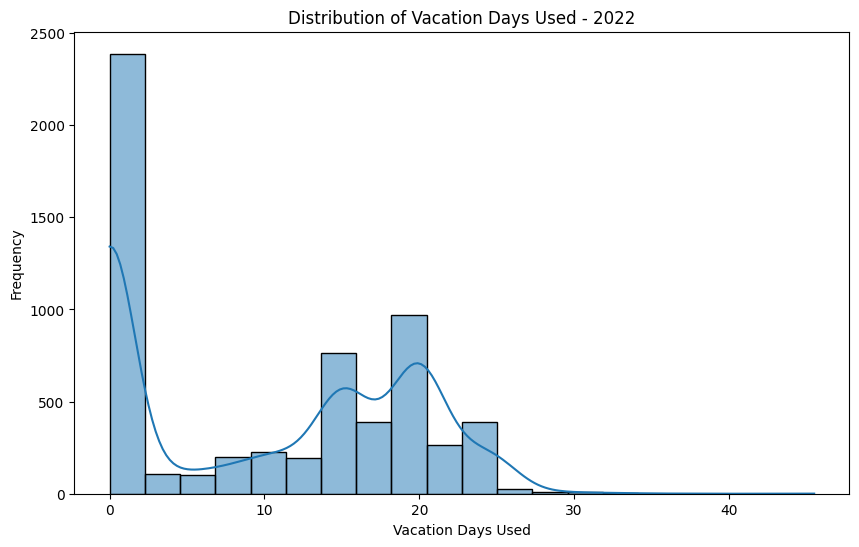

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of vacation days used for 2022
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Vacation - Used_x'], bins=20, kde=True)
plt.title('Distribution of Vacation Days Used - 2022')
plt.xlabel('Vacation Days Used')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


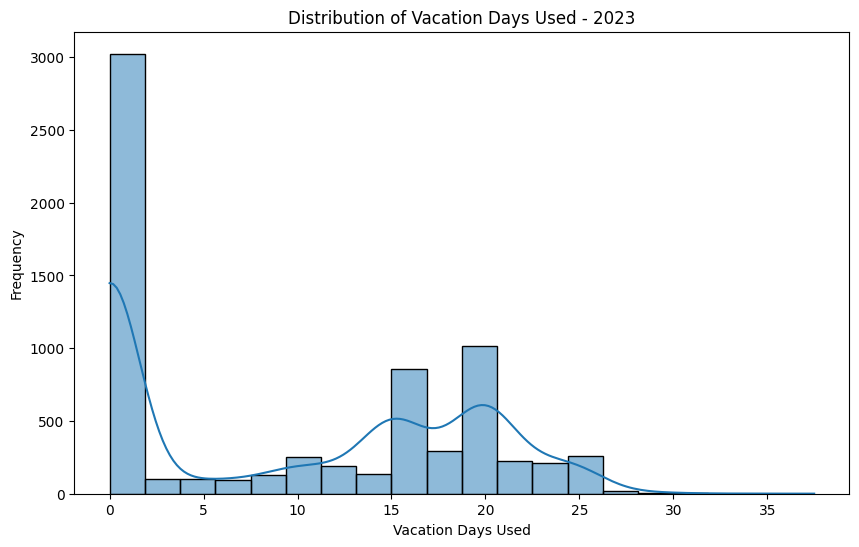

In [7]:
# Plot distribution of vacation days used for 2023
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Vacation - Used_y'], bins=20, kde=True)
plt.title('Distribution of Vacation Days Used - 2023')
plt.xlabel('Vacation Days Used')
plt.ylabel('Frequency')
plt.show()

# **CORRELATION MATRIX**

In [8]:
# Get numeric columns for correlation matrix
numeric_columns = merged_df.select_dtypes(include=['number']).columns

In [9]:
# Calculate correlation matrix for numeric columns only
corr_matrix = merged_df[numeric_columns].corr()


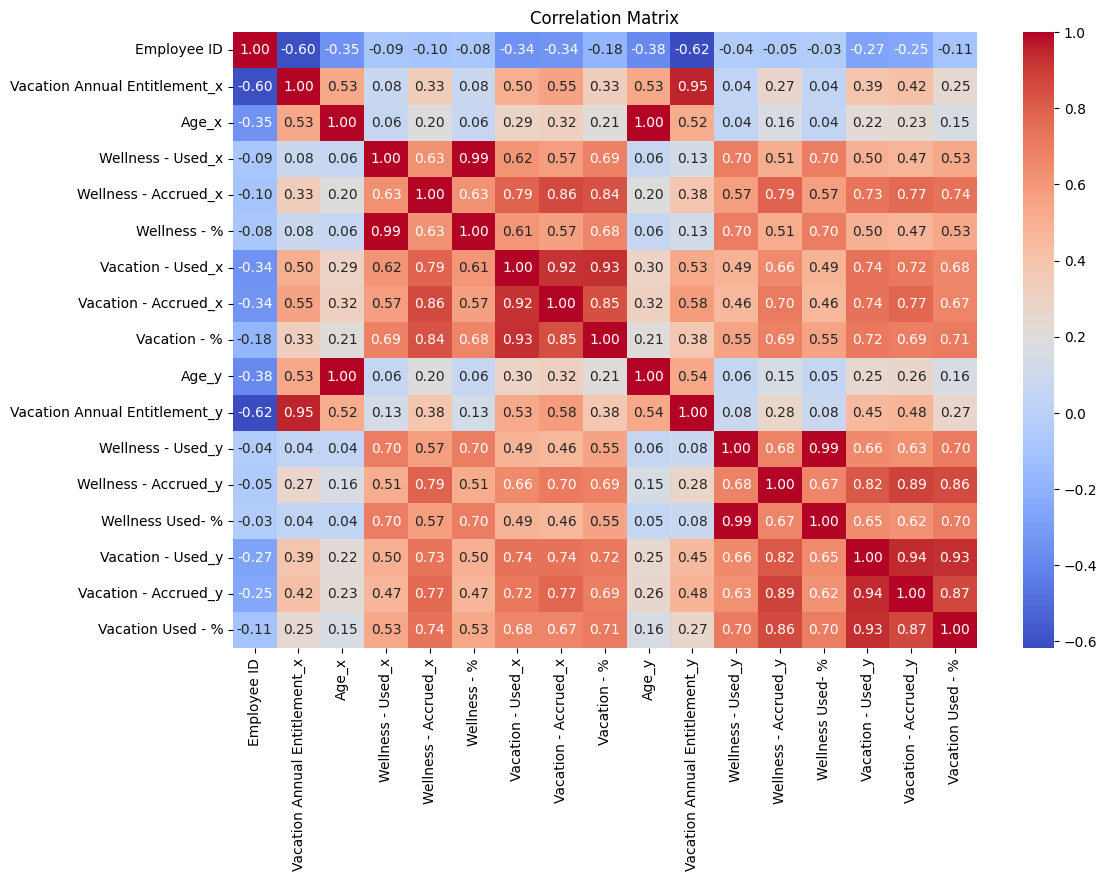

In [10]:
# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# **DISTRIBUTION OF WELLNESS USAGE**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


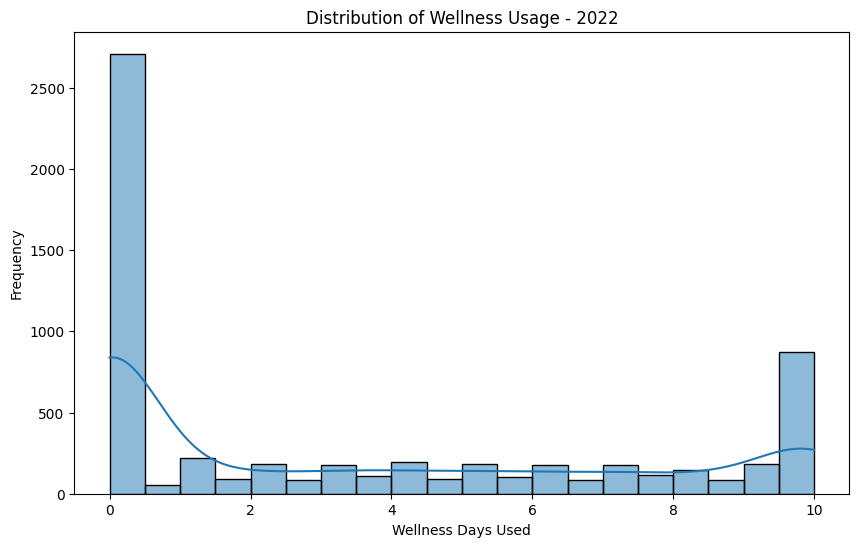

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of wellness usage for 2022
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Wellness - Used_x'], bins=20, kde=True)
plt.title('Distribution of Wellness Usage - 2022')
plt.xlabel('Wellness Days Used')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


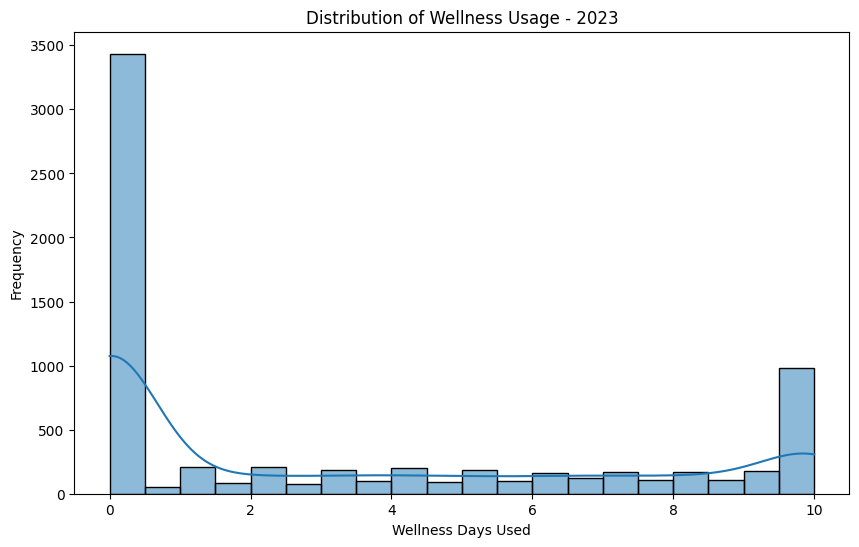

In [12]:
# Plot distribution of wellness usage for 2023
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Wellness - Used_y'], bins=20, kde=True)
plt.title('Distribution of Wellness Usage - 2023')
plt.xlabel('Wellness Days Used')
plt.ylabel('Frequency')
plt.show()

# **AVERAGE WELLNESS USED BY EMPLOYEE STATUS**

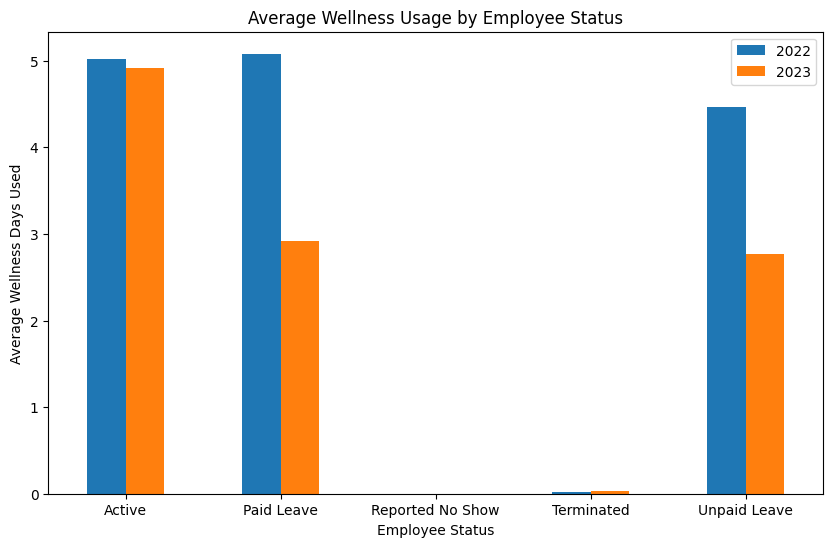

In [13]:
# Group data by Employee Status and calculate average wellness usage for both years
wellness_grouped = merged_df.groupby('Employee Status_x')[['Wellness - Used_x', 'Wellness - Used_y']].mean()

# Plot average wellness usage by Employee Status
wellness_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Average Wellness Usage by Employee Status')
plt.xlabel('Employee Status')
plt.ylabel('Average Wellness Days Used')
plt.xticks(rotation=0)
plt.legend(['2022', '2023'])
plt.show()

# **WELLNESS USEAGE BY GRADE**

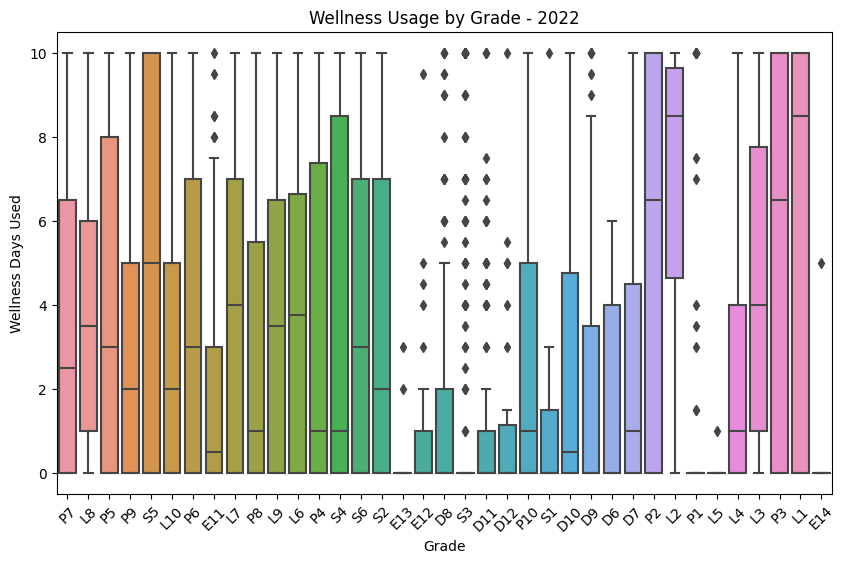

In [14]:
# Plot box plot of wellness usage by Grade for 2022
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grade_x', y='Wellness - Used_x', data=merged_df)
plt.title('Wellness Usage by Grade - 2022')
plt.xlabel('Grade')
plt.ylabel('Wellness Days Used')
plt.xticks(rotation=45)
plt.show()


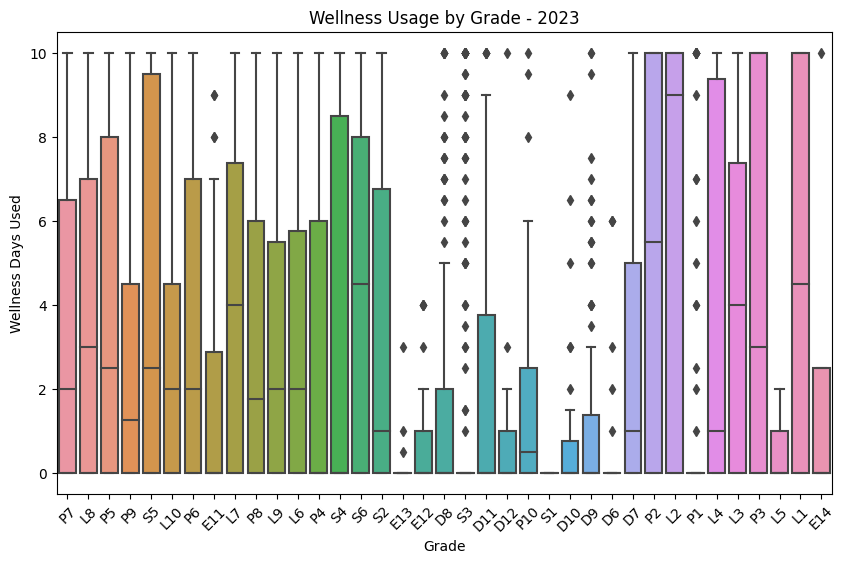

In [15]:
# Plot box plot of wellness usage by Grade for 2023
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grade_y', y='Wellness - Used_y', data=merged_df)
plt.title('Wellness Usage by Grade - 2023')
plt.xlabel('Grade')
plt.ylabel('Wellness Days Used')
plt.xticks(rotation=45)
plt.show()

# **WELLNESS USAGE BY CAREER STREAM**

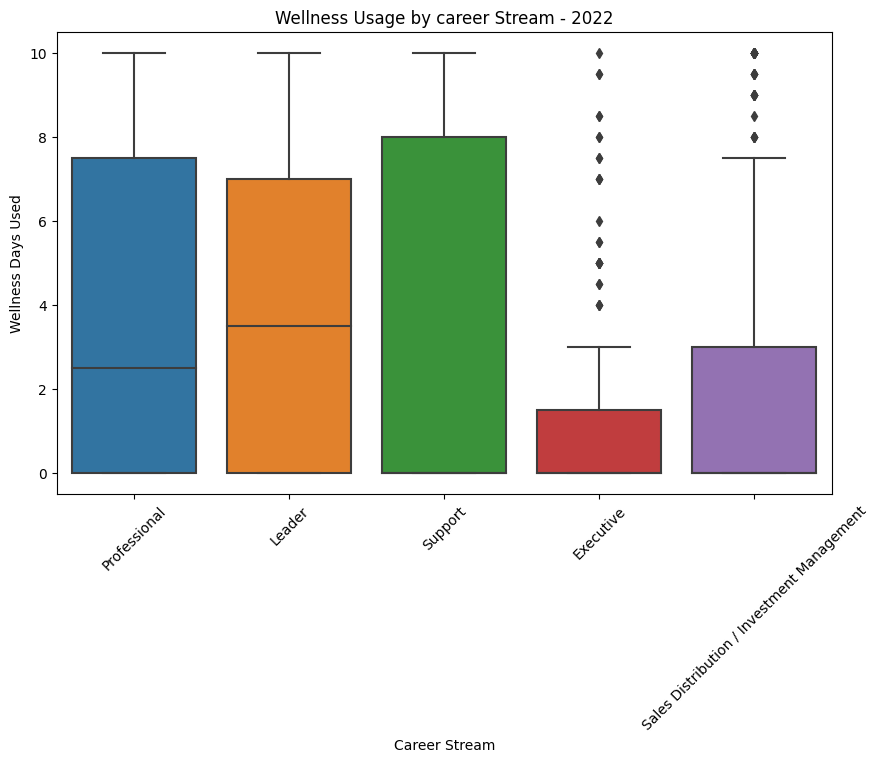

In [16]:
# Plot box plot of wellness usage by Career stream for 2022
plt.figure(figsize=(10, 6))
sns.boxplot(x='Career Stream_x', y='Wellness - Used_x', data=merged_df)
plt.title('Wellness Usage by career Stream - 2022')
plt.xlabel('Career Stream')
plt.ylabel('Wellness Days Used')
plt.xticks(rotation=45)
plt.show()


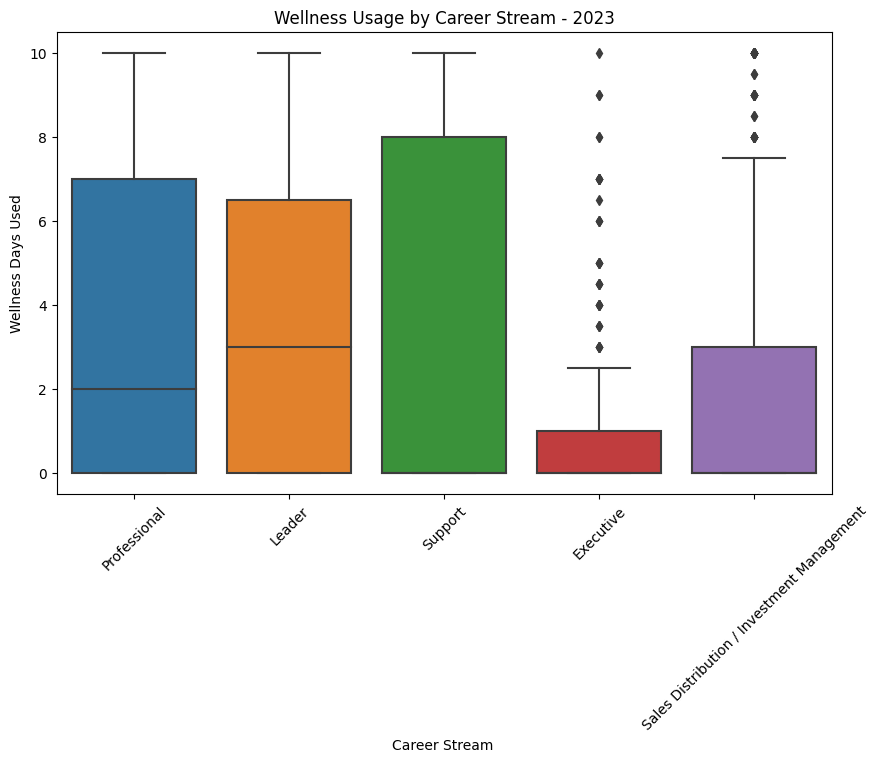

In [17]:
# Plot box plot of wellness usage by Career stream  for 2023
plt.figure(figsize=(10, 6))
sns.boxplot(x='Career Stream_y', y='Wellness - Used_y', data=merged_df)
plt.title('Wellness Usage by Career Stream - 2023')
plt.xlabel('Career Stream ')
plt.ylabel('Wellness Days Used')
plt.xticks(rotation=45)
plt.show()

# **WELLNESS USAGE BY GENDER**

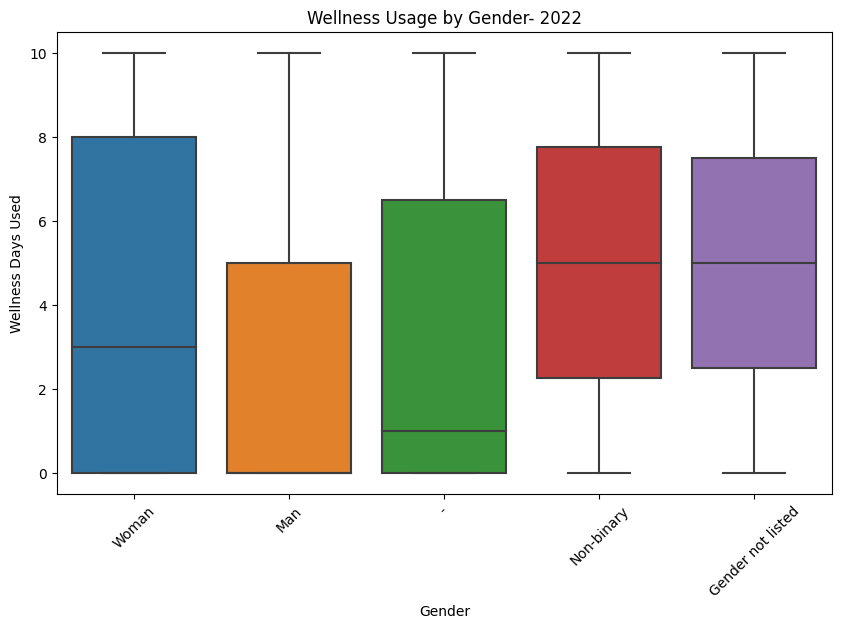

In [18]:
# Plot box plot of wellness usage by Gender for 2022
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender_x', y='Wellness - Used_x', data=merged_df)
plt.title('Wellness Usage by Gender- 2022')
plt.xlabel('Gender')
plt.ylabel('Wellness Days Used')
plt.xticks(rotation=45)
plt.show()

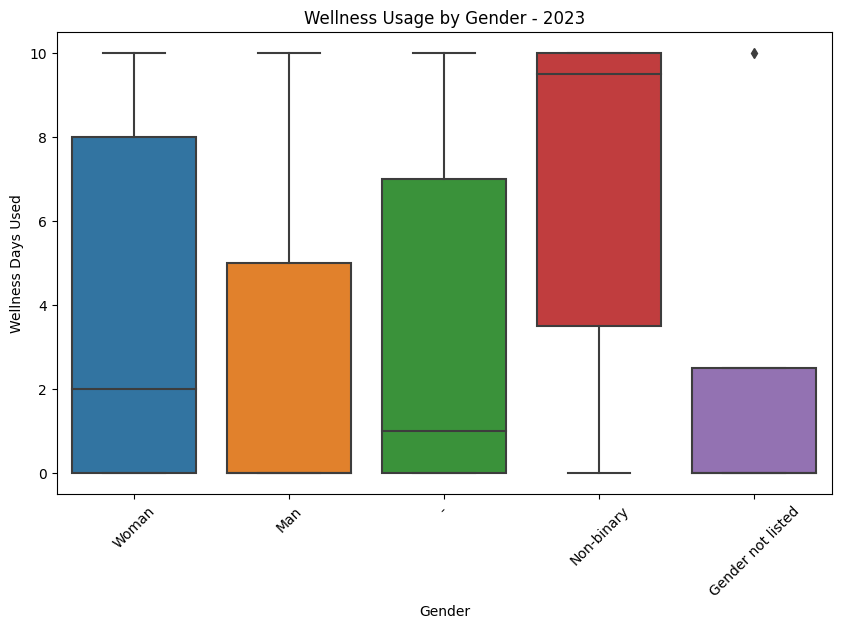

In [19]:
# Plot box plot of wellness usage by Gender for 2023
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender_y', y='Wellness - Used_y', data=merged_df)
plt.title('Wellness Usage by Gender - 2023')
plt.xlabel('Gender')
plt.ylabel('Wellness Days Used')
plt.xticks(rotation=45)
plt.show()


# **CORRELATION BETWEEN WELLNESS USED, AGE, AND VACATION USED**

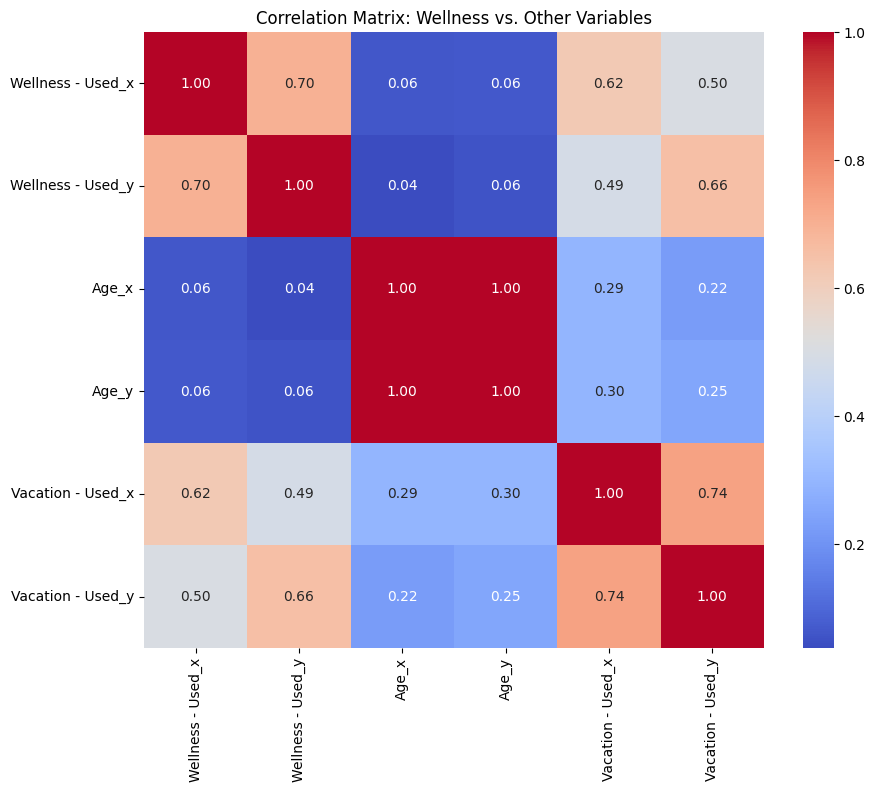

In [20]:
# Calculate correlations between wellness usage and other numeric variables
wellness_corr = merged_df[['Wellness - Used_x', 'Wellness - Used_y', 'Age_x','Age_y', 'Vacation - Used_x', 'Vacation - Used_y']].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(wellness_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Wellness vs. Other Variables')
plt.show()

## Hypothesis Testing: Wellness Usage and Employee Retention

### Hypothesis
- **Null Hypothesis (H0):** There is no significant difference in wellness usage between employees who stay and employees who leave the company.
- **Alternative Hypothesis (H1):** Employees who stay use significantly more wellness benefits compared to employees who leave.

### Methodology
- I performed a two-sample t-test to compare the mean wellness usage between employees who are active (stay) and those who are terminated (leave).
- The significance level (alpha) chosen was 0.05.


In [21]:
import scipy.stats as stats

# Separate wellness usage data for employees who stay and those who leave
wellness_stay = merged_df.loc[merged_df['Employee Status_x'] == 'Active', 'Wellness - Used_x']
wellness_leave = merged_df.loc[merged_df['Employee Status_x'] == 'Terminated', 'Wellness - Used_x']

In [22]:
# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(wellness_stay, wellness_leave, equal_var=True)


In [23]:
# Print t-statistic and p-value
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 59.54929608933553
P-value: 0.0


In [24]:
# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in wellness usage between employees who stay and those who leave.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in wellness usage between employees who stay and those who leave.")

Reject null hypothesis: There is a significant difference in wellness usage between employees who stay and those who leave.


# Results
- **T-Statistic:** 59.55
- **P-Value:** 0.0 (rounded)

# Conclusion
- Based on the results of the t-test:
  - **Reject Null Hypothesis:** There is a significant difference in wellness usage between employees who stay and those who leave the company.
  - Employees who stay tend to use significantly more wellness benefits compared to employees who leave.

# Correlation Analysis:
I'll start by calculating the correlation coefficients between wellness usage and other relevant variables such as age, vacation days used, etc. This will help us understand the strength and direction of these relationships.

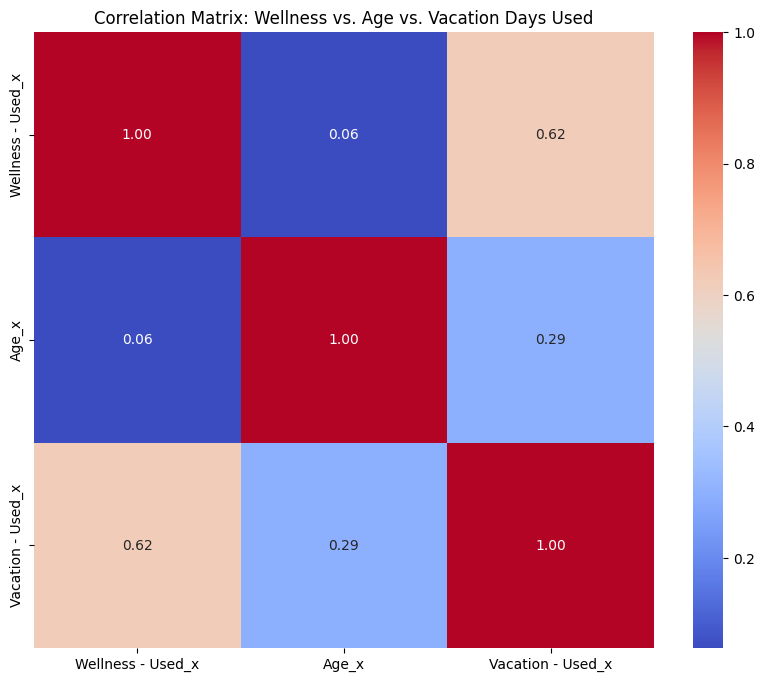

Correlation Matrix:
                               Employee ID  Vacation Annual Entitlement_x  \
Employee ID                       1.000000                      -0.602802   
Vacation Annual Entitlement_x    -0.602802                       1.000000   
Age_x                            -0.350633                       0.534915   
Wellness - Used_x                -0.086591                       0.082760   
Wellness - Accrued_x             -0.099079                       0.332575   
Wellness - %                     -0.079062                       0.077978   
Vacation - Used_x                -0.344016                       0.502085   
Vacation - Accrued_x             -0.336177                       0.553775   
Vacation - %                     -0.180767                       0.329327   
Age_y                            -0.378433                       0.534970   
Vacation Annual Entitlement_y    -0.617874                       0.953540   
Wellness - Used_y                -0.041682              

In [25]:
# Calculate correlation matrix
correlation_matrix = merged_df[['Wellness - Used_x', 'Age_x', 'Vacation - Used_x']].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Wellness vs. Age vs. Vacation Days Used')
plt.show()

#Print correlation matric
print("Correlation Matrix:")
print(corr_matrix)

# Regression Analysis:
I perform a regression analysis to model the relationship between wellness usage (independent variable) and employee retention (dependent variable). Since employee retention is a binary outcome (stay or leave), I use logistic regression.

In [26]:
import pandas as pd
import statsmodels.api as sm

# Drop rows with missing values in relevant columns
merged_df_cleaned = merged_df.dropna(subset=['Wellness - Used_x', 'Employee Status_x'])

# Define predictors (X) and target (y) after handling missing values
X = merged_df_cleaned[['Wellness - Used_x']]
y = (merged_df_cleaned['Employee Status_x'] == 'Active').astype(int)  # Convert 'Active' to 1, 'Terminated' to 0

# Add constant to X for intercept in regression
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.419404
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:      Employee Status_x   No. Observations:                 6044
Model:                          Logit   Df Residuals:                     6042
Method:                           MLE   Df Model:                            1
Date:                Thu, 13 Jun 2024   Pseudo R-squ.:                  0.3533
Time:                        11:27:33   Log-Likelihood:                -2534.9
converged:                       True   LL-Null:                       -3919.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6206      0.038    -16.327      0.000      -0.695      -0.546
Wellness

# SURVIVAL ANALYSIS ****

# setting Survival Analysis: Time to Employee Termination

### Approach
I conducted survival analysis to understand the duration until an employee terminates employment using the Kaplan-Meier estimator.

### Methodology
1. **Data Preparation:**
   - I calculated the tenure (time from hire to termination) in days using the 'Hire Date' and 'Termination Date' columns.
   - Rows with missing tenure values were dropped to ensure data integrity.

2. **Survival Analysis:**
   - I used the KaplanMeierFitter from the lifelines library to estimate the survival function.
   - The analysis was based on time-to-event data (tenure) and event status (termination).

3. **Visualization:**
   - A Kaplan-Meier survival curve was plotted to visualize the probability of employees not leaving the company over time.

### Results
The survival curve provides insights into the duration employees stay with the company before termination. It helps in understanding the attrition pattern and can guide HR strategies for employee retention and management.


In [27]:
!pip install lifelines

  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 4.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=319178f2c2339f6a100cfd5d8fcb55c36bd961a84085de1dfc6b593157049e58
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


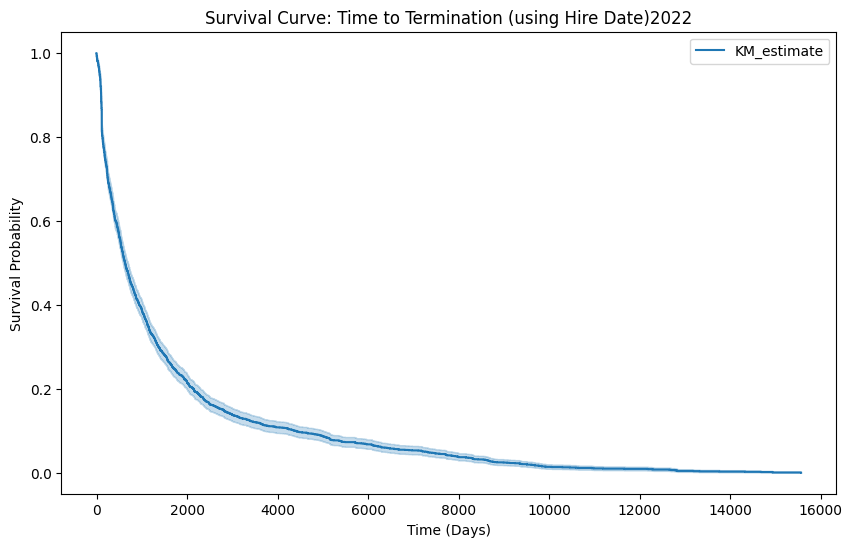

In [28]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import pandas as pd


# Calculate tenure (time until termination) in days
merged_df['Tenure'] = (merged_df['Termination Date_x'] - merged_df['Hire Date_x']).dt.days

# Drop rows with missing tenure values (if any)
merged_df_cleaned = merged_df.dropna(subset=['Tenure', 'Employee Status_x'])

# Create a Kaplan-Meier estimator object
kmf = KaplanMeierFitter()

# Define time-to-event (survival time) and event status (1 for termination, 0 for ongoing employment)
time = merged_df_cleaned['Tenure']
event = (merged_df_cleaned['Employee Status_x'] == 'Terminated').astype(int)

# Fit the Kaplan-Meier estimator
kmf.fit(time, event)

# Plot the survival curve
plt.figure(figsize=(10, 6))
kmf.plot()
plt.title('Survival Curve: Time to Termination (using Hire Date)2022')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Probability')
plt.show()

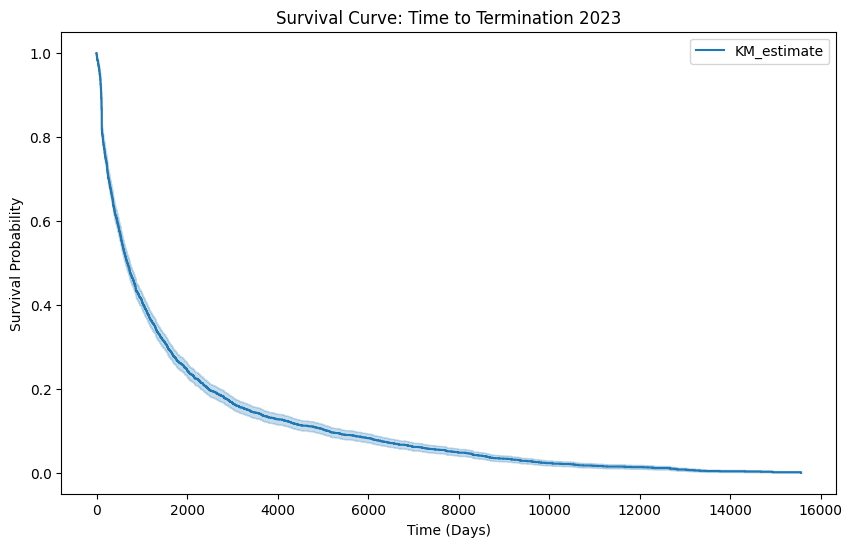

In [29]:

# Calculate tenure (time from hire to termination) in days
merged_df['Tenure'] = (merged_df['Termination Date_y'] - merged_df['Hire Date_y']).dt.days

# Drop rows with missing tenure values (if any)
merged_df_cleaned = merged_df.dropna(subset=['Tenure', 'Employee Status_y'])

# Create a Kaplan-Meier estimator object
kmf = KaplanMeierFitter()

# Define time-to-event (survival time) and event status (1 for termination, 0 for ongoing employment)
time = merged_df_cleaned['Tenure']
event = (merged_df_cleaned['Employee Status_y'] == 'Terminated').astype(int)

# Fit the Kaplan-Meier estimator
kmf.fit(time, event)

# Plot the survival curve
plt.figure(figsize=(10, 6))
kmf.plot()
plt.title('Survival Curve: Time to Termination 2023')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Probability')
plt.show()

# **PREDICTIVE MODELING **

## Predictive Modeling: Random Forest Classifier for Employee Retention

### Approach
I capabilities employed a Random Forest Classifier to predict the likelihood of an employee staying or leaving the company based on various features including wellness usage, age, and vacation days used.

### Methodology
1. **Data Preparation:**
   - I selected 'Wellness - Used_x', 'Age', and 'Vacation - Used_x' as predictors (X) and 'Employee Status' as the target (y).

2. **Model Training and Testing:**
   - The dataset was split into training and testing sets (80% training, 20% testing) using `train_test_split` from sklearn.
   - I trained the Random Forest Classifier with 100 estimators using `RandomForestClassifier` from sklearn.

3. **Model Evaluation:**
   - I evaluated the model's performance on the test data using accuracy metrics.
   - The accuracy score, classification report, and confusion matrix were generated to assess the model's predictive capabilities.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Drop rows with missing values in relevant columns
merged_df_cleaned = merged_df.dropna(subset=['Wellness - Used_x', 'Age_x', 'Vacation - Used_x', 'Employee Status_x'])

# Define predictors (X) and target (y) after handling missing values
X = merged_df_cleaned[['Wellness - Used_x', 'Age_x', 'Vacation - Used_x']]
y = (merged_df_cleaned['Employee Status_x'] == 'Active').astype(int)  # Convert 'Active' to 1, 'Terminated' to 0

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on training data
rf_classifier.fit(X_train, y_train)

# Make predictions on test data
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9214226633581473

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       426
           1       0.94      0.93      0.94       783

    accuracy                           0.92      1209
   macro avg       0.91      0.92      0.91      1209
weighted avg       0.92      0.92      0.92      1209


Confusion Matrix:
[[383  43]
 [ 52 731]]


# Results
- **Accuracy:** 0.92 (rounded)

- **Confusion Matrix:**
  ((383 43) (52 731))

### Conclusion
The Random Forest Classifier model provides insights into the factors influencing employee retention. Further analysis and feature engineering can enhance the model's predictive power and provide actionable insights for employee management strategies.


In [31]:
import pandas as pd
df_1 = pd.read_excel('/kaggle/input/wellness2/2.xlsx', sheet_name = 'Diversity Data')

df_2 = pd.read_excel('/kaggle/input/wellness2/2.xlsx', sheet_name = '2023 Overtime Hours')

df_3 = pd.read_excel('/kaggle/input/wellness2/2.xlsx', sheet_name = '2022 Overtime Hours')

df_4 = pd.read_excel('/kaggle/input/wellness2/2.xlsx', sheet_name = '2022 Attrition Data')

df_5 = pd.read_excel('/kaggle/input/wellness2/2.xlsx', sheet_name = '2023 Attrition Data')

df_6 = pd.read_excel('/kaggle/input/wellness2/2.xlsx', sheet_name = '2023 Talent Review Data')

df_7 = pd.read_excel('/kaggle/input/wellness2/2.xlsx', sheet_name = '2023 Performance Data')

df_8 = pd.read_excel('/kaggle/input/wellness2/2.xlsx', sheet_name = '2022 Performance Data')



**CORRELATION METRIX**

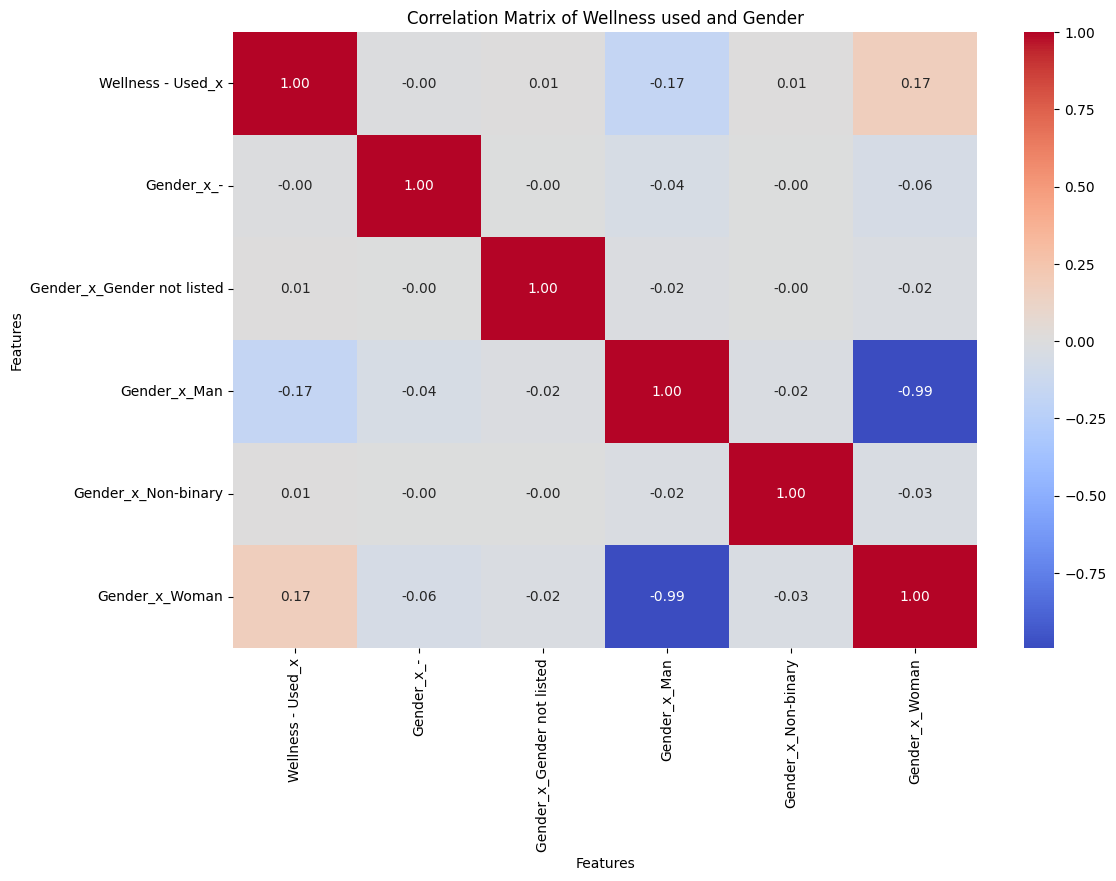

In [32]:

# Convert categorical data to numerical using one-hot encoding
df_encoded = pd.get_dummies(merged_df_cleaned[['Wellness - Used_x', 'Gender_x']])

corr_matrix_encoded = df_encoded.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wellness used and Gender')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

/tmp/ipykernel_18/467953103.py:15: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_combined = df_combined.apply(pd.to_numeric, errors='ignore')


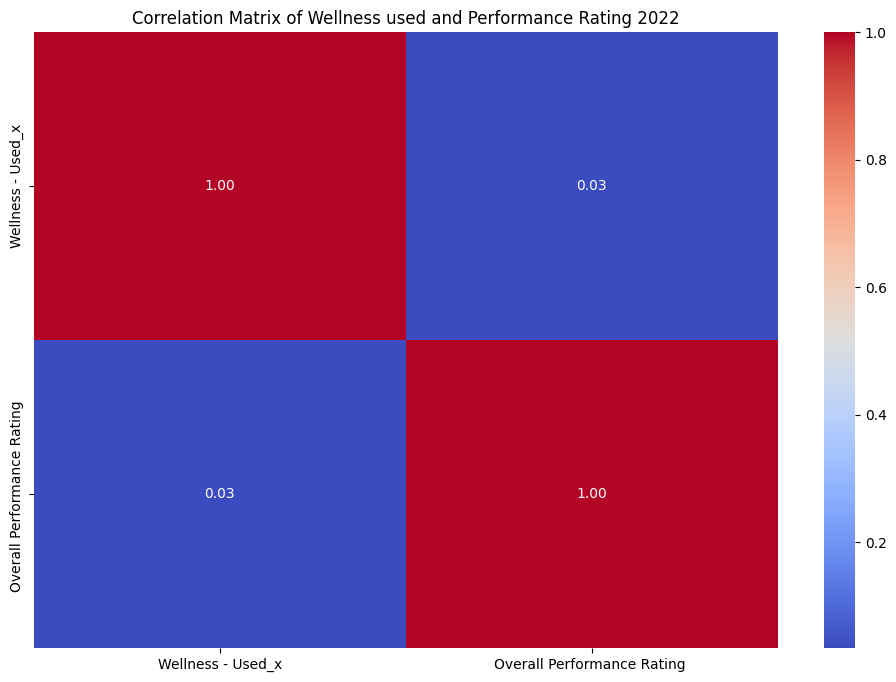

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt



df_combined = pd.DataFrame()
df_combined['Wellness - Used_x'] = merged_df['Wellness - Used_x']
df_combined['Overall Performance Rating '] = df_8['Overall Performance Rating']


# Replace 'unrate' with NaN values in the DataFrame
df_combined.replace('Unrated', pd.NA, inplace=True)

# Convert columns to numeric (if needed) to handle NaN values
df_combined = df_combined.apply(pd.to_numeric, errors='ignore')

# Drop rows with NaN values in any column
df_combined.dropna(inplace=True)

# Compute the correlation matrix for the combined DataFrame
corr_matrix_combined = df_combined.corr()


# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_combined, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wellness used and Performance Rating 2022')
plt.show()

/tmp/ipykernel_18/1396843458.py:15: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_combined = df_combined.apply(pd.to_numeric, errors='ignore')


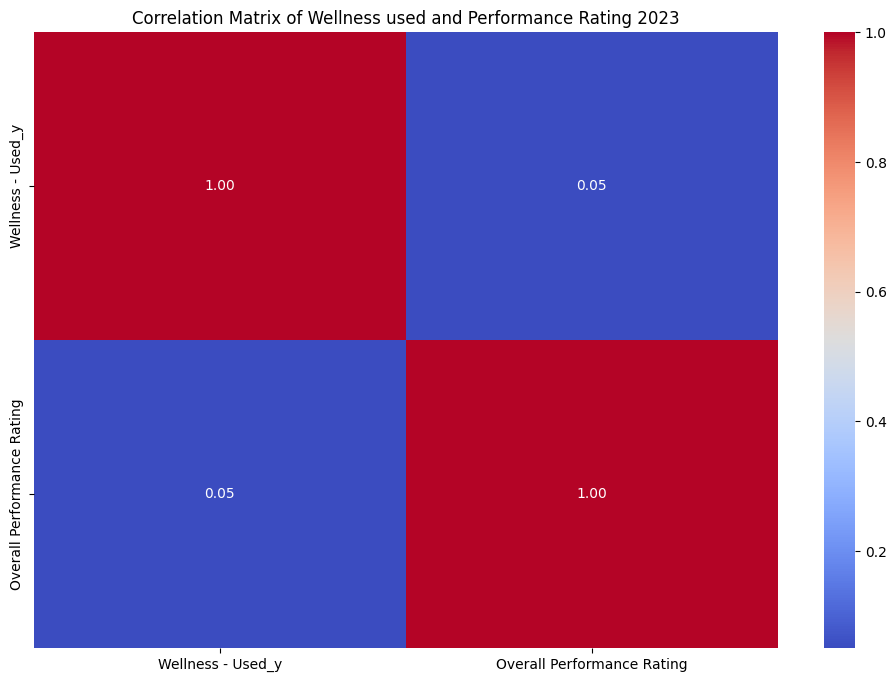

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt



df_combined = pd.DataFrame()
df_combined['Wellness - Used_y'] = merged_df['Wellness - Used_y']
df_combined['Overall Performance Rating'] = df_7['Overall Performance Rating']


# Replace 'unrate' with NaN values in the DataFrame
df_combined.replace('Unrated', pd.NA, inplace=True)

# Convert columns to numeric (if needed) to handle NaN values
df_combined = df_combined.apply(pd.to_numeric, errors='ignore')

# Drop rows with NaN values in any column
df_combined.dropna(inplace=True)

# Compute the correlation matrix for the combined DataFrame
corr_matrix_combined = df_combined.corr()


# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_combined, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wellness used and Performance Rating 2023')
plt.show()